In [30]:
# Reading the dataset.
import pandas as pd
data = pd.read_csv ("Data_Breach_Data_Product2.csv")
print(data.head())
data.info(verbose = True, show_counts=True)

             Name    Id  WashingtoniansAffected  Year  DaysToIdentifyBreach  \
0  Delta Airlines  9561                   24563  2018                   183   
1  Delta Airlines  9561                       0  2019                     0   
2  Delta Airlines  9561                       0  2020                     0   
3  Delta Airlines  9561                       0  2021                     0   
4  Delta Airlines  9561                       0  2022                     0   

   DaysElapsedBeforeNotification   Revenue  
0                             14         0  
1                              0         0  
2                              0  17095000  
3                              0  29899000  
4                              0  50582000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                        

In [32]:
# Filtering the dataset. Revenue greater than 0.
data2 = data[ data['Revenue'] > 0 ]
data2.describe().to_csv("descriptive.csv")
data2.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 2 to 148
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           138 non-null    object
 1   Id                             138 non-null    int64 
 2   WashingtoniansAffected         138 non-null    int64 
 3   Year                           138 non-null    int64 
 4   DaysToIdentifyBreach           138 non-null    int64 
 5   DaysElapsedBeforeNotification  138 non-null    int64 
 6   Revenue                        138 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.6+ KB


In [34]:
# Creating the x & y data arrays.
y = data2["Revenue"].values 

x = data2[['WashingtoniansAffected', 'DaysToIdentifyBreach', 
           'DaysElapsedBeforeNotification']].values.reshape(-1, 3)

print(y)

print(x)

[ 17095000  29899000  50582000  58048000  47262000  51761000  46298000
    308487    358003    377241    315660   3566000   6176000   9646000
   3413987   3463270   3472185   3337800   3804100   4133200 195929000
 226954000 242290000   2066000   3028000   5891000   6667000  10106321
  10997989  11154722  11287607    393655    475152    509480    503405
   1733825   1896989   2095505   2181578  11691000  18520000  20762000
  18837000  58158000  62286000  66608000  77794000   3339817   2132000
   1958000   1945000  11139000  17455000  31877000  37281000   5987600
   6228600   7806600   8096400   4463000   5301000   5919000   6037000
   1837358   1686666   1536760 132498000 137888000 148258000  77155000
  83064000  92870000 106374000       128       405     12514     12834
   1987727   2714790   2914735   2673329 173916000 174746000 197348000
 239103000  10687000  11546000  11891000  13125000   2208805   1532000
   8840000  13900000  17224000  19820000  20720000  22736000  45828000
  5641

In [35]:
# Train test split. 
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, 
                test_size = 0.20, random_state = 47) 

# Fitting the regression model. 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
skreg = LinearRegression().fit(train_X, train_y)
       
# KFold Cross validation.
from sklearn.model_selection import cross_val_predict, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=47)

In [36]:
# Computing the MSE and the training dataset. 
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_predict
# Predict train from KFold cross-validation
y_pred = cross_val_predict(skreg, train_X, train_y, cv=kfold, method='predict')
# Compute RMSE and MSE
mse_kfold_train = MSE(train_y, y_pred)
rmse_kfold_train = np.sqrt(mse_kfold_train)
print("KFold MSE train: % f" %(mse_kfold_train))
print("KFold RMSE train : % f" %(rmse_kfold_train))

KFold MSE train:  5201634413902079.000000
KFold RMSE train :  72122357.240332


In [37]:
# Computing the MSE on test dataset. 
y_pred = cross_val_predict(skreg, test_X, test_y, cv=kfold, method='predict')
# Compute RMSE and MSE
mse_kfold_test = MSE(test_y, y_pred)
rmse_kfold_test = np.sqrt(mse_kfold_test)
print("KFold MSE test: % f" %(mse_kfold_test))
print("KFold RMSE test: % f" %(rmse_kfold_test))

KFold MSE test:  2561426062617198.000000
KFold RMSE test:  50610533.119275


In [38]:
# Performing ordinary least Squares Regression.
import statsmodels.api as sm
model = sm.OLS(train_y, train_X)    
ols_fit = model.fit()
ols_fit.summary()

# Predict train from OLS
ols_pred_train = ols_fit.predict(train_X) 
mse_ols_train = ols_fit.mse_model
rmse_ols_train = np.sqrt(ols_fit.mse_model)
print("OLS MSE train: % f" %(mse_ols_train))
print("OLS RMSE train: % f" %(rmse_ols_train))
    
# Predict test from OLS
ols_pred_test = ols_fit.predict(test_X)
mse_ols_test = MSE(test_y, ols_pred_test)
rmse_ols_test = np.sqrt(mse_ols_test)
print("OLS MSE test: % f" %(mse_ols_test))
print("OLS RMSE test: % f" %(rmse_ols_test))

OLS MSE train:  569634778487488.000000
OLS RMSE train:  23867022.824129
OLS MSE test:  3062808976506903.000000
OLS RMSE test:  55342650.609696


In [39]:
# Show the regression results.
print( ols_fit.summary())
with open('regression_summary.txt', 'w') as f:
    f.write(ols_fit.summary().as_text())
     

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.023
Method:                 Least Squares   F-statistic:                             0.1675
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                       0.918
Time:                        21:18:05   Log-Likelihood:                         -2121.5
No. Observations:                 110   AIC:                                      4249.
Df Residuals:                     107   BIC:                                      4257.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

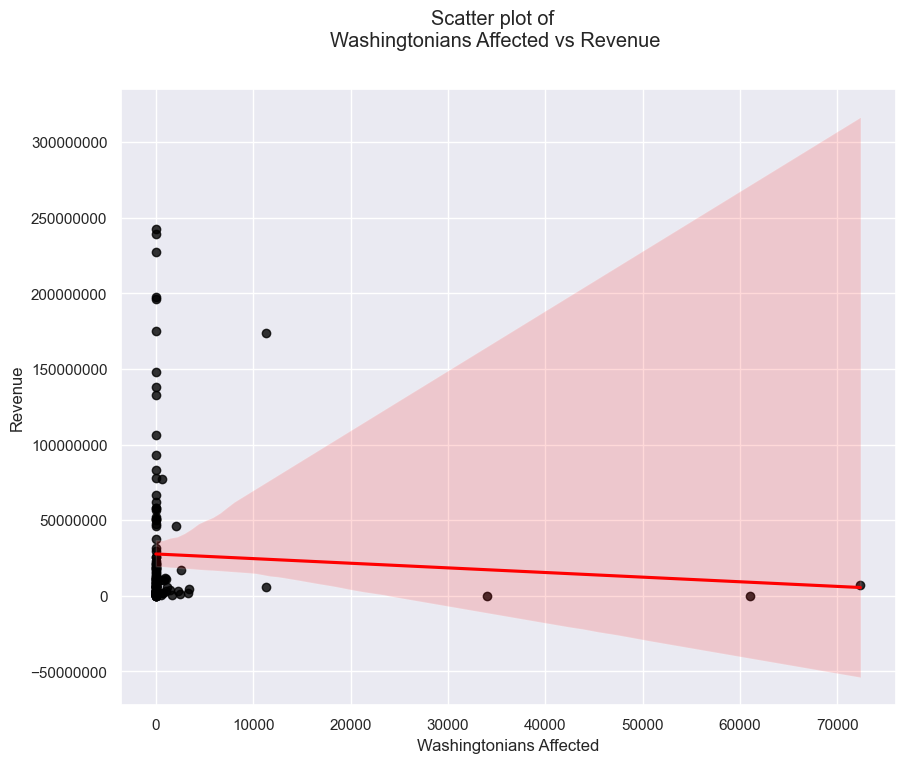

<Figure size 640x480 with 0 Axes>

In [28]:
# Produce a Scatter Plot.
import seaborn as sns   
import matplotlib.pyplot as plt
x_var = data2['WashingtoniansAffected']
y_var = data2['Revenue']

x_name = 'Washingtonians Affected'
y_name = 'Revenue'

plt.close()

fig, ax = plt.subplots(figsize=(10, 8))  
sns.set(font_scale=1.0)

ax = sns.regplot(data2, x = x_var, y = y_var, 
    scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.suptitle("Scatter plot of \n" + x_name + " vs " + y_name)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.ticklabel_format(style='plain')
plt.show()
plt.savefig("ScatterPlot_Washingtonians_Affected.png")

In [33]:
# Compute Correlations.
df_cont = data2[["Revenue", "WashingtoniansAffected", "DaysToIdentifyBreach", "DaysElapsedBeforeNotification"]]
correlation_matrix = df_cont.corr()
correlation_matrix.to_csv("correlation.csv")
print(correlation_matrix)

                                Revenue  WashingtoniansAffected  \
Revenue                        1.000000               -0.052107   
WashingtoniansAffected        -0.052107                1.000000   
DaysToIdentifyBreach          -0.069149                0.049784   
DaysElapsedBeforeNotification -0.036157               -0.001014   

                               DaysToIdentifyBreach  \
Revenue                                   -0.069149   
WashingtoniansAffected                     0.049784   
DaysToIdentifyBreach                       1.000000   
DaysElapsedBeforeNotification              0.097554   

                               DaysElapsedBeforeNotification  
Revenue                                            -0.036157  
WashingtoniansAffected                             -0.001014  
DaysToIdentifyBreach                                0.097554  
DaysElapsedBeforeNotification                       1.000000  


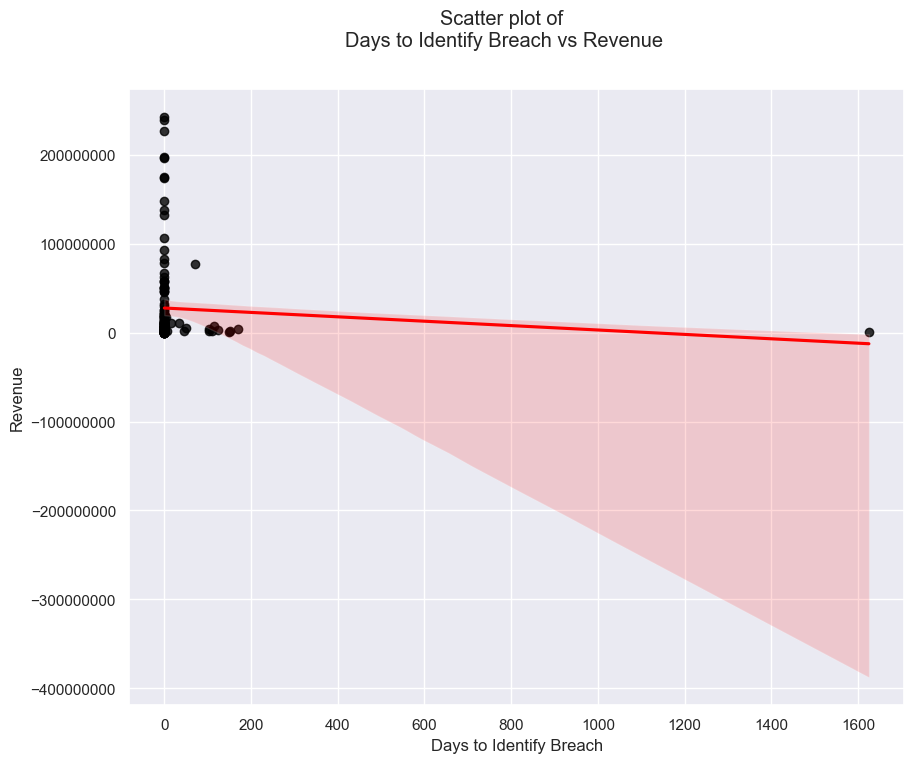

In [26]:
# Produce Scatter Plots.
import seaborn as sns   
x_var = data2['DaysToIdentifyBreach']
y_var = data2['Revenue']

x_name = 'Days to Identify Breach'
y_name = 'Revenue'

plt.close()

fig, ax = plt.subplots(figsize=(10, 8))  
sns.set(font_scale=1.0)

ax = sns.regplot(data2, x = x_var, y = y_var, 
    scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.suptitle("Scatter plot of \n" + x_name + " vs " + y_name)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.ticklabel_format(style='plain')
plt.show()

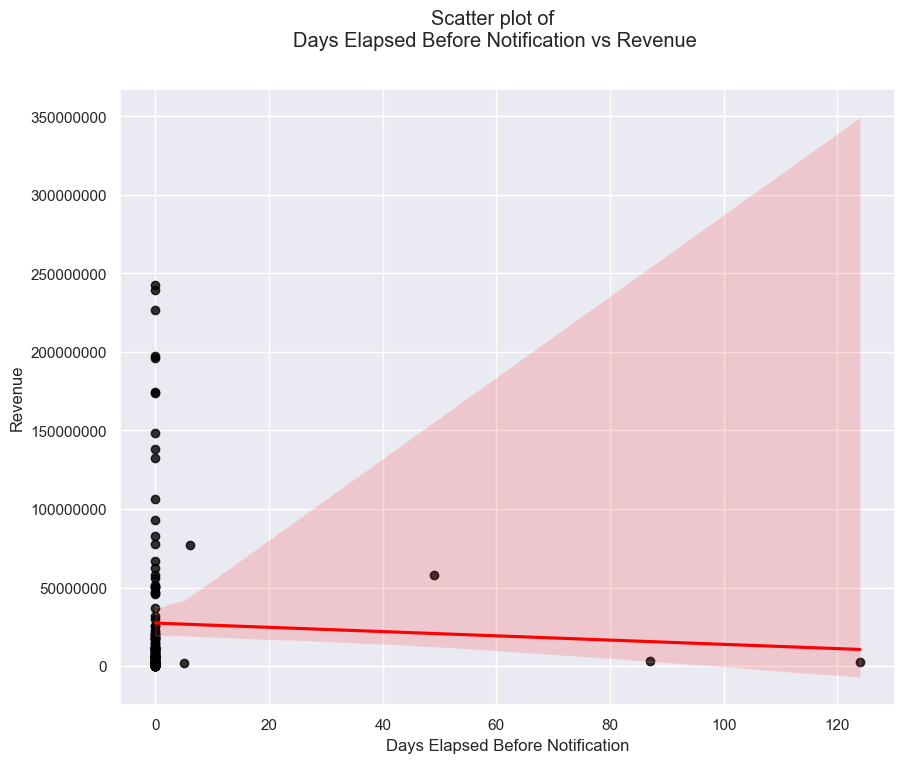

In [27]:
# Produce Scatter Plots. 
import seaborn as sns   
x_var = data2['DaysElapsedBeforeNotification']
y_var = data2['Revenue']

x_name = 'Days Elapsed Before Notification'
y_name = 'Revenue'

plt.close()

fig, ax = plt.subplots(figsize=(10, 8))  
sns.set(font_scale=1.0)

ax = sns.regplot(data2, x = x_var, y = y_var, 
    scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.suptitle("Scatter plot of \n" + x_name + " vs " + y_name)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.ticklabel_format(style='plain')
plt.show()